# House Price Prediction Model By Using Machine Learning

In [2]:
!pip install xgboost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
import xgboost
print(xgboost.__file__)

C:\Users\matha\anaconda3\Lib\site-packages\xgboost\__init__.py


***Importing The California Housing Dataset***

In [6]:
from sklearn.datasets import fetch_california_housing
house_price_dataset=fetch_california_housing()
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [7]:
# Loading the Dataset to pandas DataFrame
df=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [8]:
# Add the target (price) column to the Dataframe
df['MedHouseVal']=house_price_dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.shape

(20640, 9)

In [10]:
#check for the missing value
df.isnull().sum() # the sum() will count th total sum of the missing value

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
# Statistical Measure of the dataSet
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


***Understand about Positive Correlation & Negative Correlation***

<Axes: >

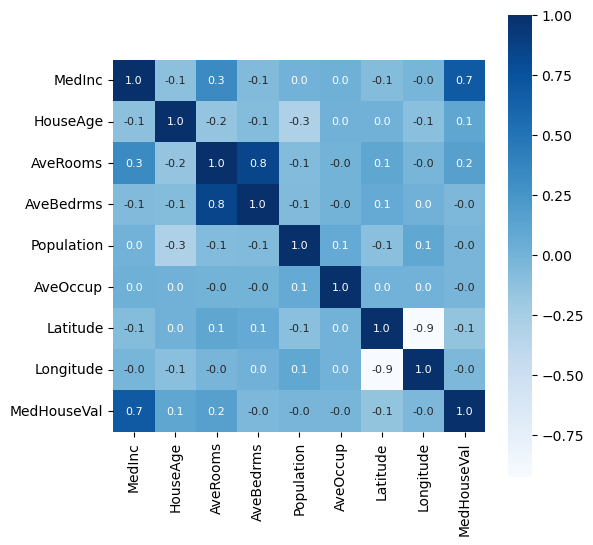

In [13]:
correlation=df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

***Splitting The Data & Target***

In [15]:
X=df.drop(['MedHouseVal'],axis=1)
Y=df['MedHouseVal']
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

***Splitting The Data into Training Data & Test Data***

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


***Model Traning***

***XGBoost Regressor***

In [33]:
model=XGBRegressor()

In [40]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

***Model Evaluation***

**Prediction on training Data**

In [55]:
training_data_prediction=model.predict(X_train)
print(training_data_prediction[:1000])

[0.5523039  3.0850039  0.5835302  2.310718   1.4580092  2.8919494
 4.2584085  2.0111814  1.0252554  3.4020548  5.0805907  1.7576598
 2.0677762  1.8493054  2.1403747  3.3406632  3.3995788  0.9947858
 1.7804332  2.953775   2.242482   1.4224372  2.9064353  1.3589915
 1.8498393  2.7713513  3.0687342  2.690045   0.9229922  1.0682734
 1.916483   0.7060843  1.0329409  4.6740923  1.3895812  0.5652341
 1.959158   4.6417947  3.4191725  1.8507385  1.4389927  3.4178207
 1.02248    1.1083055  0.8212047  5.0531397  1.5810082  1.9790201
 1.5892102  1.2915171  2.943054   1.2682779  2.2227972  1.057588
 1.0526277  4.010459   1.3054132  5.0327067  2.5898335  3.8855433
 3.1787903  1.9326687  1.1675671  2.6558237  2.1805158  1.6165935
 1.925088   1.2112659  2.5675957  4.8523083  1.5413672  3.263883
 1.8827611  1.9868912  1.9619687  1.8615184  1.2911286  3.804037
 2.0847077  0.97461486 1.4064199  2.4477863  3.0220637  1.6183778
 2.4863455  3.8774178  3.8092108  0.6219906  2.161224   3.020241
 0.52295065 2.

In [59]:
# R Squared Error
score_1=metrics.r2_score(Y_train,training_data_prediction)
# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)
print('R Squared error is',score_1)
print("Mean Absolute Error is",score_2)

R Squared error is 0.943650140819218
Mean Absolute Error is 0.1933648700612105


***Visualizing the actual prices and predicted prices***

***Prediction On Testing Data***

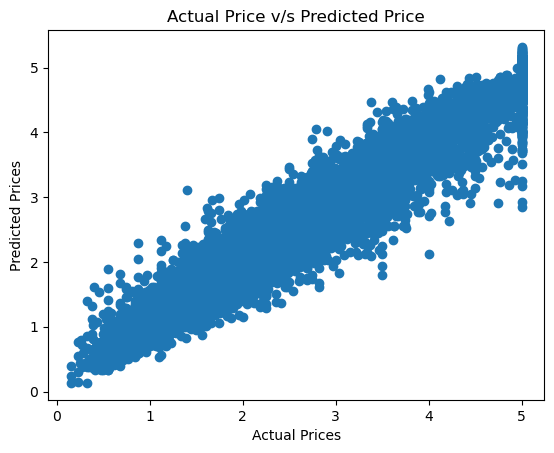

In [75]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v/s Predicted Price")
plt.show()

In [62]:
testing_data_prediction=model.predict(X_test)
print(testing_data_prediction[:1000])

[2.8649795  1.790346   0.92074925 4.0887103  3.5433683  1.933211
 2.6471033  0.89486724 1.2575151  3.0265667  2.772075   1.6421634
 3.9572585  0.88425756 3.1704764  0.6554215  0.8537058  2.8161037
 1.5448594  1.3870643  1.5228461  4.8835707  1.43369    1.2352356
 1.6308751  0.8890431  3.8820763  0.9501168  3.2249734  1.0574758
 1.7951108  2.436357   4.5643983  1.5228479  0.55151534 2.0205724
 1.9586719  2.5872488  0.57897264 1.2793069  1.7301942  1.5303934
 0.82772845 3.693916   1.2827423  1.6770135  3.6946008  5.0824194
 2.7102115  1.2879231  0.8518483  1.4061962  0.4890247  0.62560654
 2.690893   4.2791443  2.4190218  1.65842    3.6181345  1.3145108
 1.0028913  4.000314   1.7531236  1.8272933  3.865851   1.6627101
 2.1103826  1.8253014  2.8488503  1.7322501  1.8882267  3.3577359
 1.3389974  3.6004403  1.9052883  3.7042787  1.3571098  1.5287137
 1.5392457  2.9063344  0.5832256  1.540773   1.6382413  2.0746882
 4.7362094  0.58029824 1.3865856  3.6695945  2.457236   4.6045084
 3.5003095

In [70]:
# R squared Error
score_1=metrics.r2_score(Y_test,testing_data_prediction)
# Mean absolute error
score_2=metrics.mean_absolute_error(Y_test,testing_data_prediction)
print("R squared error is=",score_1)
print("Mean Absolute error is=",score_2)

R squared error is= 0.8338000331788725
Mean Absolute error is= 0.3108631800268186


***Prediction On Testing Data***

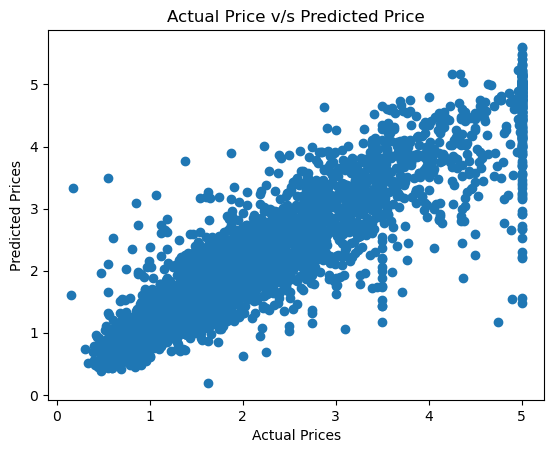

In [79]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v/s Predicted Price")
plt.show()